In [2]:
import numpy as np
import cv2
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [3]:
alphabets = ['0','1','2','3','4','5','6','7','8','9',
             'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from matplotlib import pyplot as plt = list()
for i in alphabets:
    dataset_classes.append([i])

In [34]:
print(alphabets[35])
print(dataset_classes[35])

Z
['Z']


In [18]:
data = pickle.load(open("data.pickle","rb"))
labels = pickle.load(open("labels.pickle","rb"))

In [19]:
print(type(data))

<class 'list'>


In [20]:
label_list = []
for l in labels:
    label_list.append([l])

In [33]:
print(labels[0])
print(label_list[0])

O
['O']


In [38]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(dataset_classes)

OneHotEncoder(handle_unknown='ignore')

In [43]:
print(type(dataset_classes))
print(len(dataset_classes))
print(dataset_classes[35])

<class 'list'>
36
['Z']


In [44]:
labels_ohe = ohe.transform(label_list).toarray()

In [49]:
print(type(labels_ohe))
print(len(labels_ohe))

print(type(label_list))
print(len(label_list))

<class 'numpy.ndarray'>
73152
<class 'list'>
73152


In [53]:
print(type(data))
print(len(data))
print(type(data[0]))
print(len(data[0]))

<class 'list'>
73152
<class 'numpy.ndarray'>
28


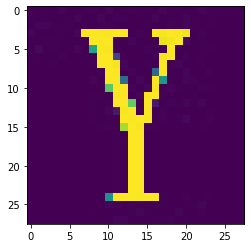

In [58]:
plt.imshow(data[73145])

In [59]:
data = np.array(data)

In [60]:
print(type(data))
print(len(data))
print(type(data[0]))
print(len(data[0]))

<class 'numpy.ndarray'>
73152
<class 'numpy.ndarray'>
28


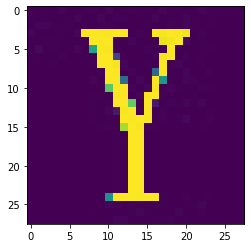

In [61]:
plt.imshow(data[73145])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(data, labels_ohe, test_size=0.20, random_state=42)

In [68]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [69]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

58521
14631
58521
14631


In [70]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(58521, 28, 28)
(14631, 28, 28)
(58521, 36)
(14631, 36)


In [73]:
X_train = X_train.reshape(58521,28,28,1)
X_test = X_test.reshape(14631,28,28,1)

In [74]:
print(X_train.shape)
print(X_test.shape)

(58521, 28, 28, 1)
(14631, 28, 28, 1)


In [78]:
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(36, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [79]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=20, batch_size=64)

Epoch 1/20
915/915 [==============================] - 60s 65ms/step - loss: 1.4145 - accuracy: 0.5967 - val_loss: 0.3228 - val_accuracy: 0.9131
Epoch 2/20
915/915 [==============================] - 66s 72ms/step - loss: 0.4291 - accuracy: 0.8754 - val_loss: 0.2079 - val_accuracy: 0.9401
Epoch 3/20
915/915 [==============================] - 67s 73ms/step - loss: 0.3173 - accuracy: 0.9062 - val_loss: 0.1687 - val_accuracy: 0.9500
Epoch 4/20
915/915 [==============================] - 65s 71ms/step - loss: 0.2650 - accuracy: 0.9209 - val_loss: 0.1515 - val_accuracy: 0.9575
Epoch 5/20
915/915 [==============================] - 65s 71ms/step - loss: 0.2348 - accuracy: 0.9307 - val_loss: 0.1323 - val_accuracy: 0.9577
Epoch 6/20
915/915 [==============================] - 65s 71ms/step - loss: 0.2153 - accuracy: 0.9349 - val_loss: 0.1233 - val_accuracy: 0.9604
Epoch 7/20
915/915 [==============================] - 66s 72ms/step - loss: 0.2028 - accuracy: 0.9395 - val_loss: 0.1188 - val_accuracy:

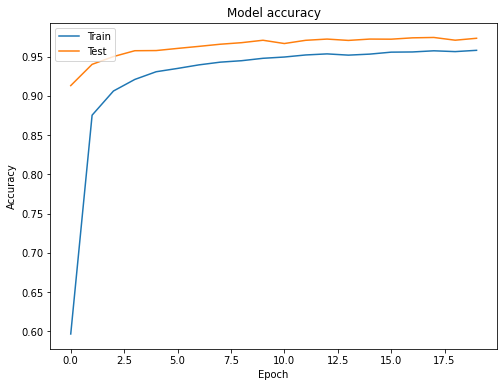

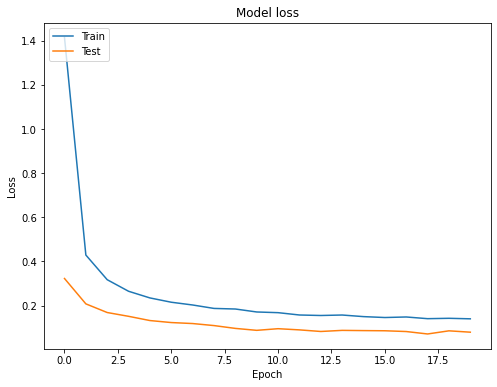

In [82]:
#model.save('cnn_classifier.h5')
# Visualization
plt.figure(figsize=[8, 6])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()